# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Moh Yahya Saifur Rizal]
- **Email:** [zonaserial.id@gmail.com]
- **ID Dicoding:** [yahyarizal]

## Menentukan Pertanyaan Bisnis

- Apa pola perilaku penyewaan sepeda yang dapat dianalisis berdasarkan musim, hari dalam seminggu, dan jam dalam sehari?
- Apakah terdapat perbedaan dalam pola penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

* Membuat tabel day

In [ ]:
day_df = pd.read_csv("/content/sample_data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Memuat tabel hour

In [ ]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

* Menilai Data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


* Menilai Data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari hasil Assesing Data sebelumnya dapat dilihat bahwa masing-masing data frame baik day_df ataupun hour_df memiliki kesalahan tipe data pada kolom dteday.

* Membersihkan Data day_df

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

* Membersihkan Data hour_df

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [ ]:
day_df.describe(include="all")

<ipython-input-12-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


- Analisis Musiman

In [ ]:
day_df.groupby(by="season").cnt.agg(['sum', 'max', 'min', 'mean', 'std'])

,sum,max,min,mean,std
season,,,,,
1,471348,7836,431,2604.132597,1399.942119
2,918589,8362,795,4992.331522,1695.977235
3,1061129,8714,1115,5644.303191,1459.800381
4,841613,8555,22,4728.162921,1699.615261


- Analisis Harian

In [ ]:
day_df.groupby(by="weekday").cnt.agg(['sum', 'max', 'min', 'mean', 'std'])

,sum,max,min,mean,std
weekday,,,,,
0,444027,8227,605,4228.828571,1872.496629
1,455503,7525,22,4338.123810,1793.074013
2,469109,7767,683,4510.663462,1826.911642
3,473048,8173,441,4548.538462,2038.095884
4,485395,7804,431,4667.259615,1939.433317
5,487790,8362,1167,4690.288462,1874.624870
6,477807,8714,627,4550.542857,2196.693009


- Analisis Penyewa Kasual Berdasarkan Musim

In [ ]:
pivot_table = pd.pivot_table(day_df, values='casual', index='season', aggfunc={'sum', 'max', 'min', 'mean', 'std'})
print(pivot_table)

         max         mean  min         std     sum
season                                            
1       3155   334.928177    9  387.655561   60622
2       3410  1106.097826  120  737.590829  203522
3       3160  1202.611702  118  595.975032  226091
4       3031   729.112360    2  606.318118  129782


- Analisis Penyewa Kasual Berdasarkan Hari

In [ ]:
pivot_table = pd.pivot_table(day_df, values='casual', index='weekday', aggfunc={'sum', 'max', 'min', 'mean', 'std'})
print(pivot_table)

          max         mean  min         std     sum
weekday                                            
0        3283  1338.295238   54  809.324777  140521
1        3065   674.133333    2  493.777298   70784
2        1348   556.182692    9  342.748705   57843
3        2562   551.144231    9  401.808954   57319
4        1405   590.961538   15  371.680307   61460
5        2469   752.288462   38  483.422400   78238
6        3410  1465.257143   57  927.082884  153852


- Analisis Penyewa Terdaftar Berdasarkan Musim

In [ ]:
pivot_table = pd.pivot_table(day_df, values='registered', index='season', aggfunc={'sum', 'max', 'min', 'mean', 'std'})
print(pivot_table)

         max         mean  min          std     sum
season                                             
1       5315  2269.204420  416  1200.269751  410726
2       6456  3886.233696  674  1353.375628  715067
3       6917  4441.691489  889  1304.626949  835038
4       6946  3999.050562   20  1444.782557  711831


- Analisis Penyewa Terdaftar Berdasarkan Hari

In [ ]:
pivot_table = pd.pivot_table(day_df, values='registered', index='weekday', aggfunc={'sum', 'max', 'min', 'mean', 'std'})
print(pivot_table)

          max         mean   min          std     sum
weekday                                              
0        5657  2890.533333   451  1179.713036  303506
1        6435  3663.990476    20  1504.215925  384719
2        6697  3954.480769   573  1549.462149  411266
3        6946  3997.394231   432  1723.710208  415729
4        6781  4076.298077   416  1642.753330  423935
5        6917  3938.000000  1129  1494.998698  409552
6        5966  3085.285714   570  1358.068784  323955


### Explore Data hour_df

In [ ]:
hour_df.describe(include="all")

<ipython-input-19-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


- Analisis Jam dalam Sehari

In [ ]:
hour_df.groupby(by="hr").cnt.agg(['sum', 'max', 'min', 'mean', 'std'])

,sum,max,min,mean,std
hr,,,,,
0,39130,283,2,53.898072,42.307910
1,24164,168,1,33.375691,33.538727
2,16352,132,1,22.869930,26.578642
3,8174,79,1,11.727403,13.239190
4,4428,28,1,6.352941,4.143818
5,14261,66,1,19.889819,13.200765
6,55132,213,1,76.044138,55.084348
7,154171,596,1,212.064649,161.441936
8,261001,839,5,359.011004,235.189285


- Analisis Penyewa Casual Berdasarkan Jam

In [ ]:
pivot_table = pd.pivot_table(hour_df, values='casual', index='hr', aggfunc={'sum', 'max', 'min', 'mean', 'std'})
print(pivot_table)

    max       mean  min        std    sum
hr                                       
0    68  10.158402    0  10.667953   7375
1    49   6.504144    0   7.735334   4709
2    44   4.772028    0   6.514780   3412
3    26   2.715925    0   4.315795   1893
4    13   1.253945    0   1.887669    874
5    16   1.411437    0   1.790581   1012
6    19   4.161379    0   3.691509   3017
7    40  11.055021    0   8.356205   8037
8    69  21.679505    0  13.741229  15761
9   142  30.891334    0  24.472856  22458
10  209  46.477304    0  41.346206  33789
11  268  59.540578    0  54.481788  43286
12  362  68.293956    0  64.394237  49718
13  355  72.308642    0  69.819228  52713
14  361  75.567901    0  71.599225  55089
15  357  74.905350    0  70.289359  54606
16  367  73.745205    0  67.015206  53834
17  347  74.273973    0  61.491021  54220
18  266  61.120879    0  50.981553  44496
19  230  48.770604    0  42.328913  35505
20  237  36.233516    0  32.103347  26378
21  222  28.255495    0  25.378252

- Analisis Penyewa Terdaftar Berdasarkan Jam

In [ ]:
pivot_table = pd.pivot_table(hour_df, values='registered', index='hr', aggfunc={'sum', 'max', 'min', 'mean', 'std'})
print(pivot_table)

    max        mean  min         std     sum
hr                                          
0   234   43.739669    0   34.019585   31755
1   139   26.871547    0   27.344153   19455
2   104   18.097902    0   21.303895   12940
3    61    9.011478    0    9.743691    6281
4    22    5.098996    0    3.134479    3554
5    64   18.478382    0   12.674751   13249
6   203   71.882759    0   53.535307   52115
7   572  201.009629    1  157.120459  146134
8   808  337.331499    4  229.698404  245240
9   399  188.418157    6   84.633490  136980
10  351  127.191197    8   66.281668   92468
11  446  148.602476    5   79.090301  108034
12  526  185.021978    3   89.240873  134696
13  491  181.352538    9   87.424775  132206
14  502  165.381344   12   84.055205  120563
15  456  176.327846    4   84.488219  128543
16  481  238.238356    8  103.765726  173914
17  885  387.178082   14  211.676303  282640
18  886  364.390110   20  203.599896  265276
19  662  262.752747   11  138.708622  191284
20  461  1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pola perilaku penyewaan sepeda yang dapat dianalisis berdasarkan musim, hari dalam seminggu, dan jam dalam sehari?

- Pola Perilaku Penyewaan Sepeda Berdasarkan Musim dengan Grafik Garis

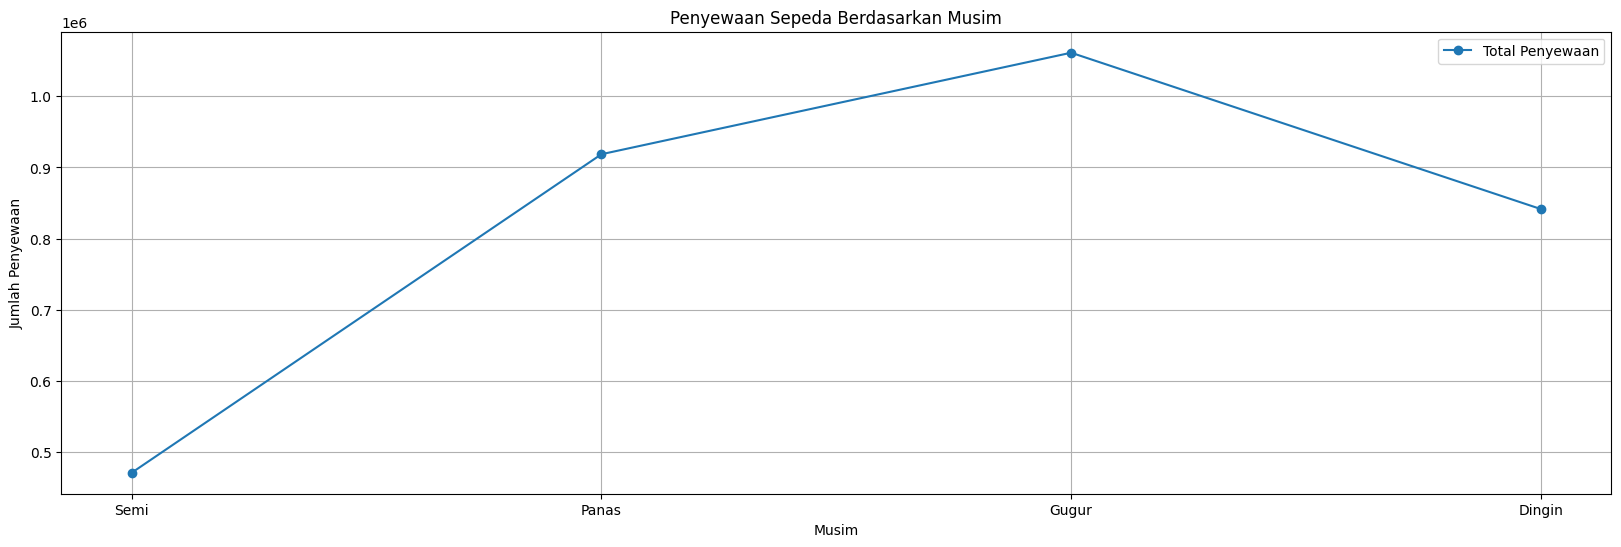

In [ ]:
season_grouped = day_df.groupby(by="season").cnt.agg(['sum'])

season_grouped.index = season_grouped.index.map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

x = season_grouped.index
y_sum = season_grouped['sum']

plt.figure(figsize=(20, 6))
plt.plot(x, y_sum, marker='o', label='Total Penyewaan')

plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')

plt.legend()

plt.grid(True)
plt.show()

- Pola Perilaku Penyewaan Sepeda Berdasarkan Hari dengan Grafik Garis

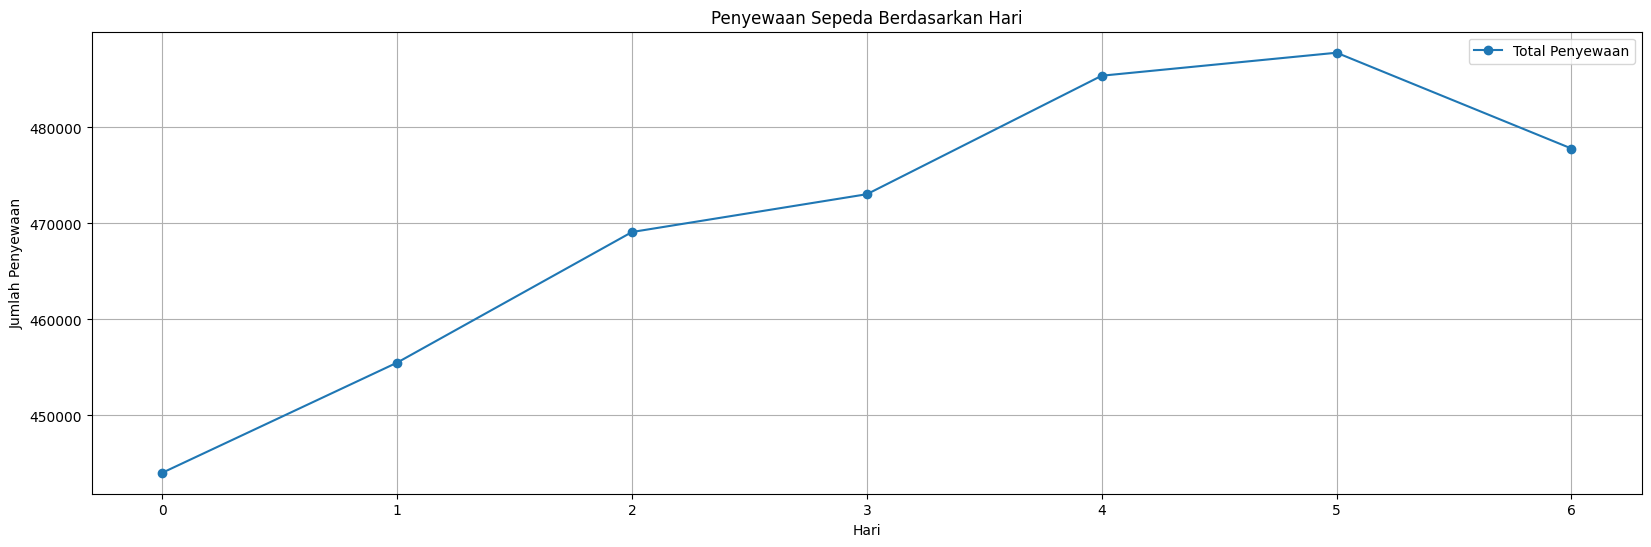

In [ ]:
season_grouped = day_df.groupby(by="weekday").cnt.agg(['sum'])

x = season_grouped.index
y_sum = season_grouped['sum']

plt.figure(figsize=(20, 6))
plt.plot(x, y_sum, marker='o', label='Total Penyewaan')

plt.title('Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')

plt.legend()

plt.grid(True)
plt.show()

- Pola Perilaku Penyewaan Sepeda Berdasarkan Jam dengan Grafik Garis

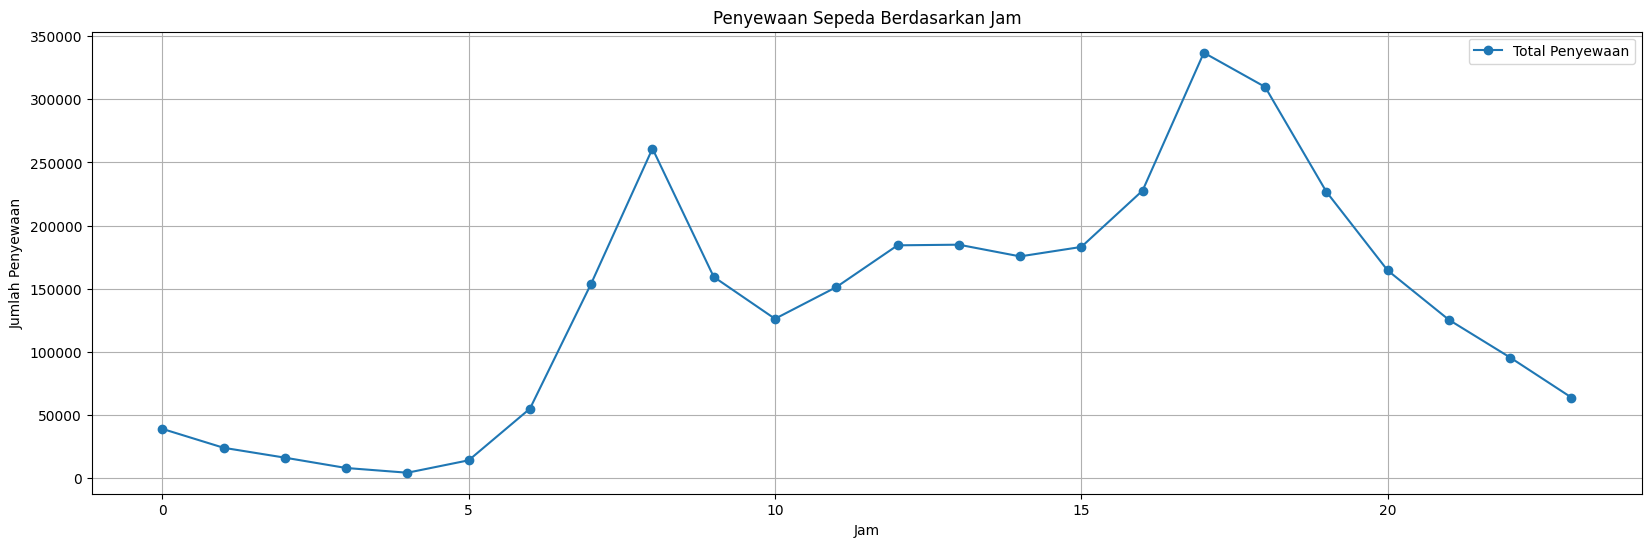

In [ ]:
season_grouped = hour_df.groupby(by="hr").cnt.agg(['sum'])

x = season_grouped.index
y_sum = season_grouped['sum']

plt.figure(figsize=(20, 6))
plt.plot(x, y_sum, marker='o', label='Total Penyewaan')

plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

plt.legend()

plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah terdapat perbedaan dalam pola penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?

#### Penyewa Casual

- Berdasarkan Musim

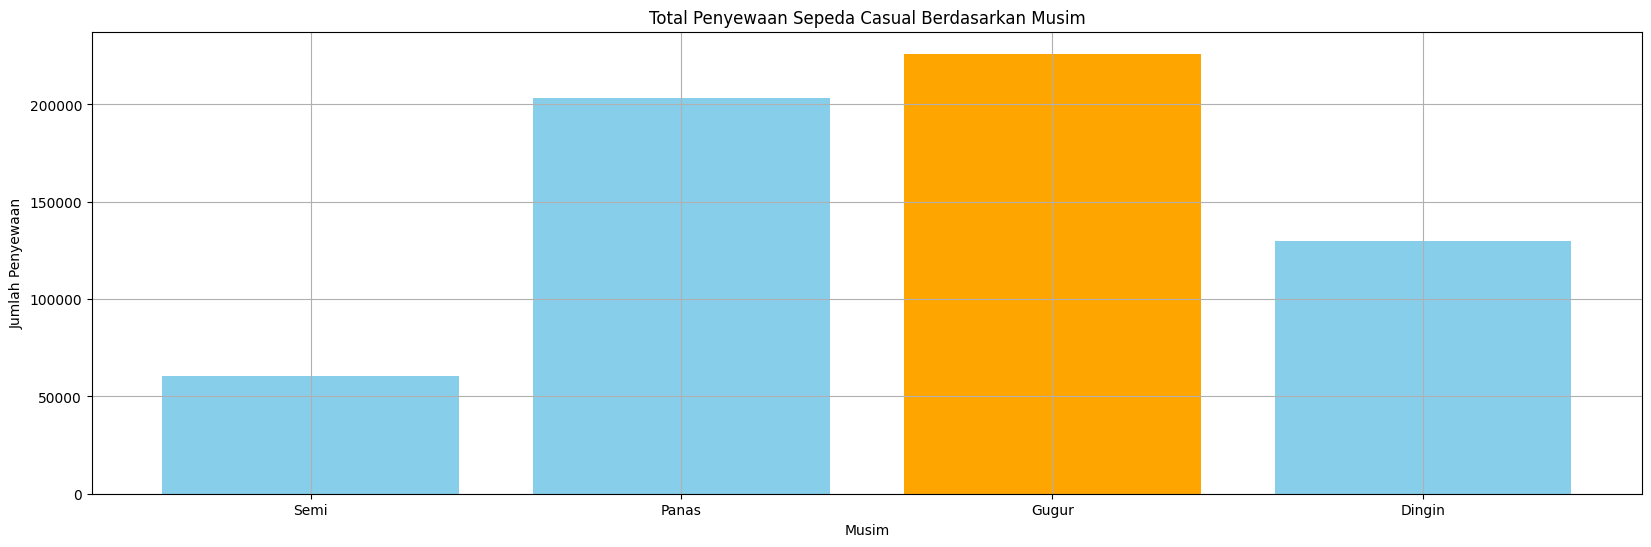

In [ ]:
pivot_table = pd.pivot_table(day_df, values='casual', index='season', aggfunc='sum')

pivot_table.index = pivot_table.index.map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

seasons = pivot_table.index
sum_values = pivot_table['casual']

plt.figure(figsize=(20, 6))

max_value = sum_values.max()

for season, value in zip(seasons, sum_values):
    if value == max_value:
        plt.bar(season, value, color='orange')
    else:
        plt.bar(season, value, color='skyblue')

plt.title('Total Penyewaan Sepeda Casual Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')

plt.xticks(seasons)
plt.grid(True)
plt.show()

- Berdasarkan Harian

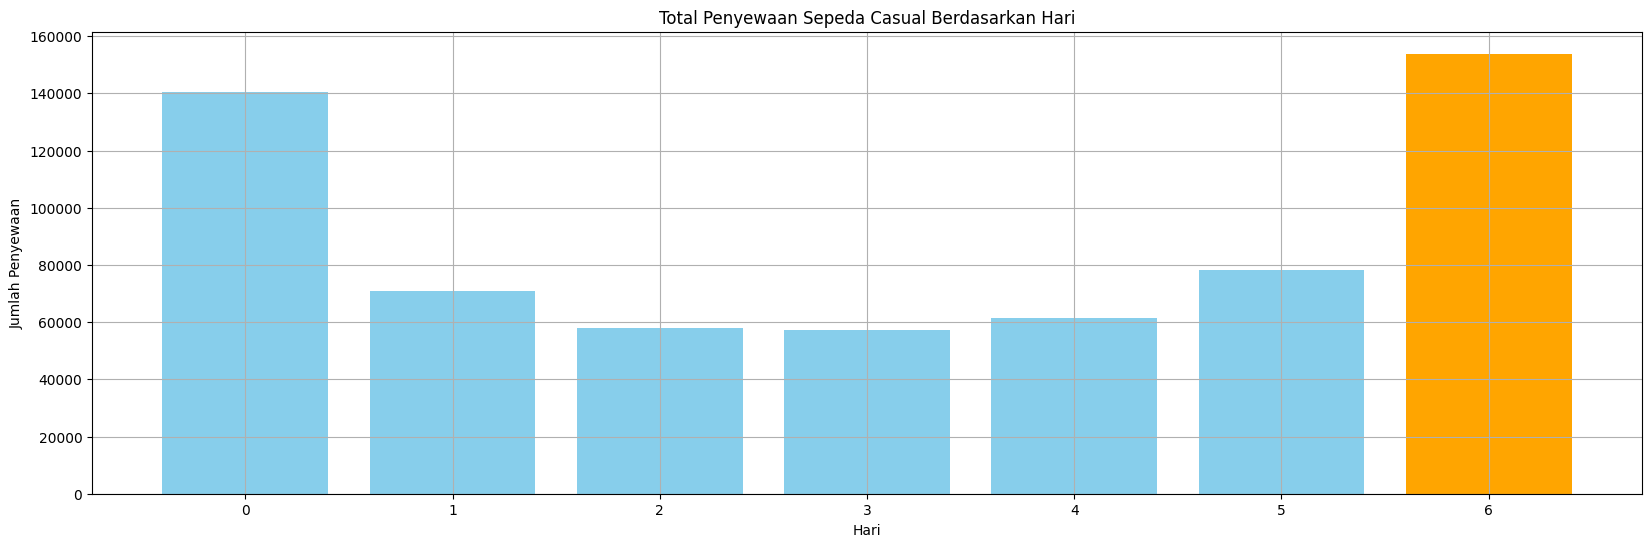

In [ ]:
pivot_table = pd.pivot_table(day_df, values='casual', index='weekday', aggfunc='sum')

seasons = pivot_table.index
sum_values = pivot_table['casual']

plt.figure(figsize=(20, 6))

max_value = sum_values.max()

for season, value in zip(seasons, sum_values):
    if value == max_value:
        plt.bar(season, value, color='orange')
    else:
        plt.bar(season, value, color='skyblue')

plt.title('Total Penyewaan Sepeda Casual Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')

plt.xticks(seasons)
plt.grid(True)
plt.show()

- Berdasarkan Jam

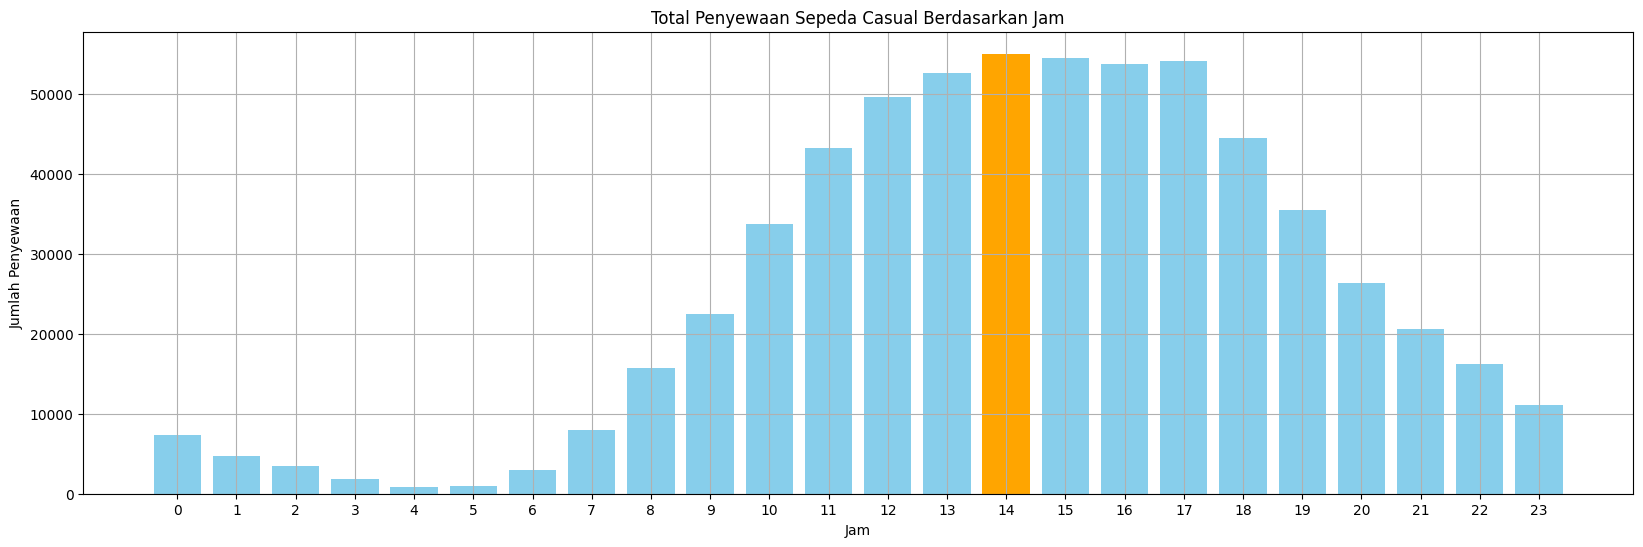

In [ ]:
pivot_table = pd.pivot_table(hour_df, values='casual', index='hr', aggfunc='sum')

seasons = pivot_table.index
sum_values = pivot_table['casual']

plt.figure(figsize=(20, 6))

max_value = sum_values.max()

for season, value in zip(seasons, sum_values):
    if value == max_value:
        plt.bar(season, value, color='orange')
    else:
        plt.bar(season, value, color='skyblue')

plt.title('Total Penyewaan Sepeda Casual Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

plt.xticks(seasons)
plt.grid(True)
plt.show()

#### Penyewa Terdaftar

- Berdasarkan Musim

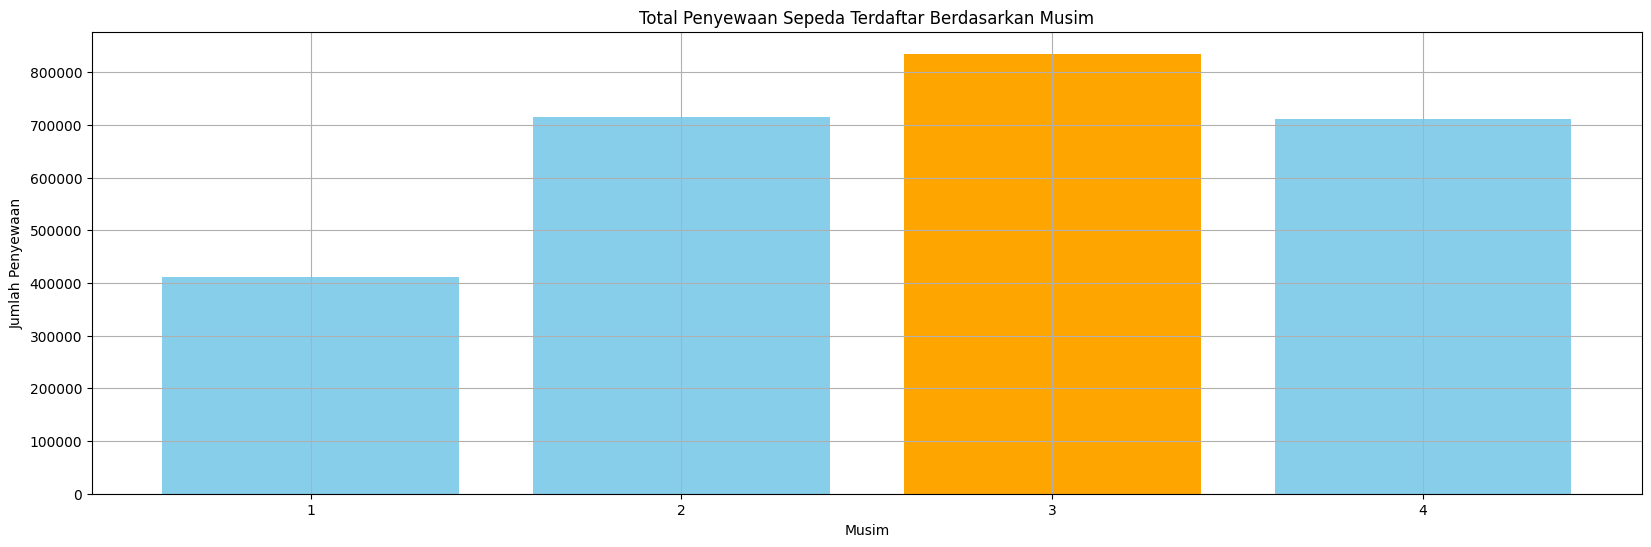

In [ ]:
pivot_table = pd.pivot_table(day_df, values='registered', index='season', aggfunc='sum')

seasons = pivot_table.index
sum_values = pivot_table['registered']

plt.figure(figsize=(20, 6))

max_value = sum_values.max()

for season, value in zip(seasons, sum_values):
    if value == max_value:
        plt.bar(season, value, color='orange')
    else:
        plt.bar(season, value, color='skyblue')

plt.title('Total Penyewaan Sepeda Terdaftar Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')

plt.xticks(seasons)
plt.grid(True)
plt.show()

- Berdasarkan Hari

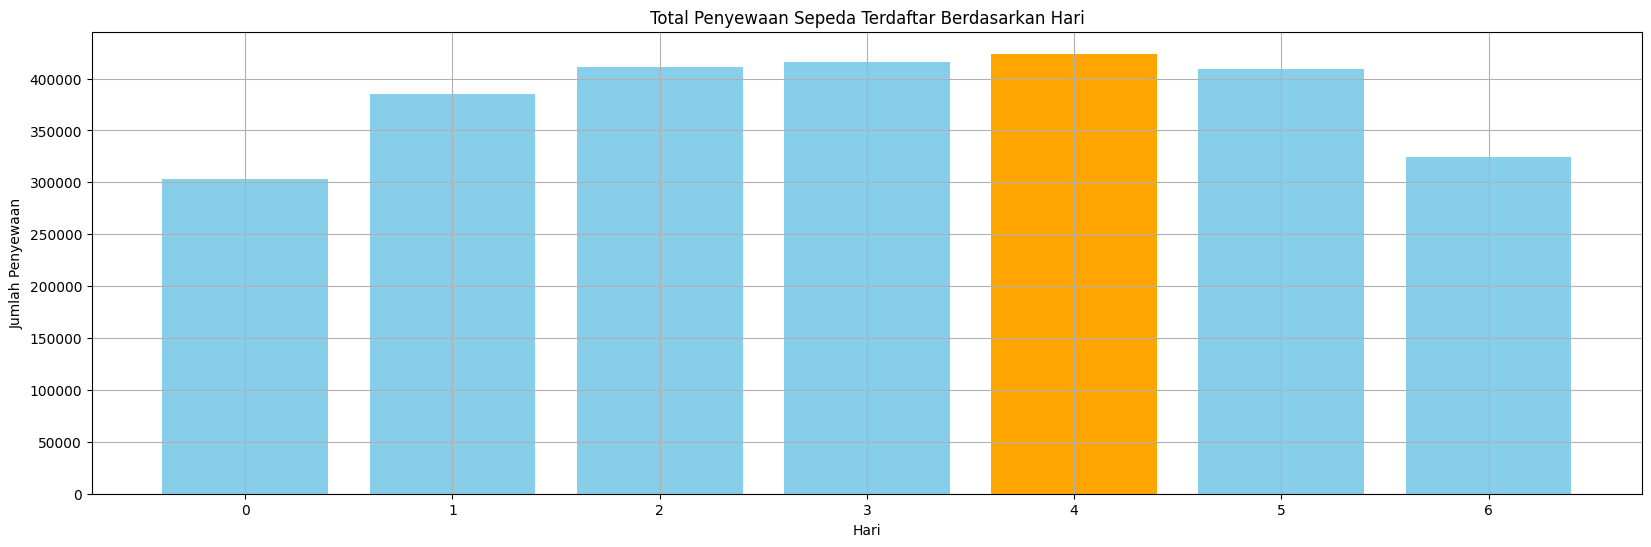

In [ ]:
pivot_table = pd.pivot_table(day_df, values='registered', index='weekday', aggfunc='sum')

seasons = pivot_table.index
sum_values = pivot_table['registered']

plt.figure(figsize=(20, 6))

max_value = sum_values.max()

for season, value in zip(seasons, sum_values):
    if value == max_value:
        plt.bar(season, value, color='orange')
    else:
        plt.bar(season, value, color='skyblue')

plt.title('Total Penyewaan Sepeda Terdaftar Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')

plt.xticks(seasons)
plt.grid(True)
plt.show()

- Berdasarkan Jam

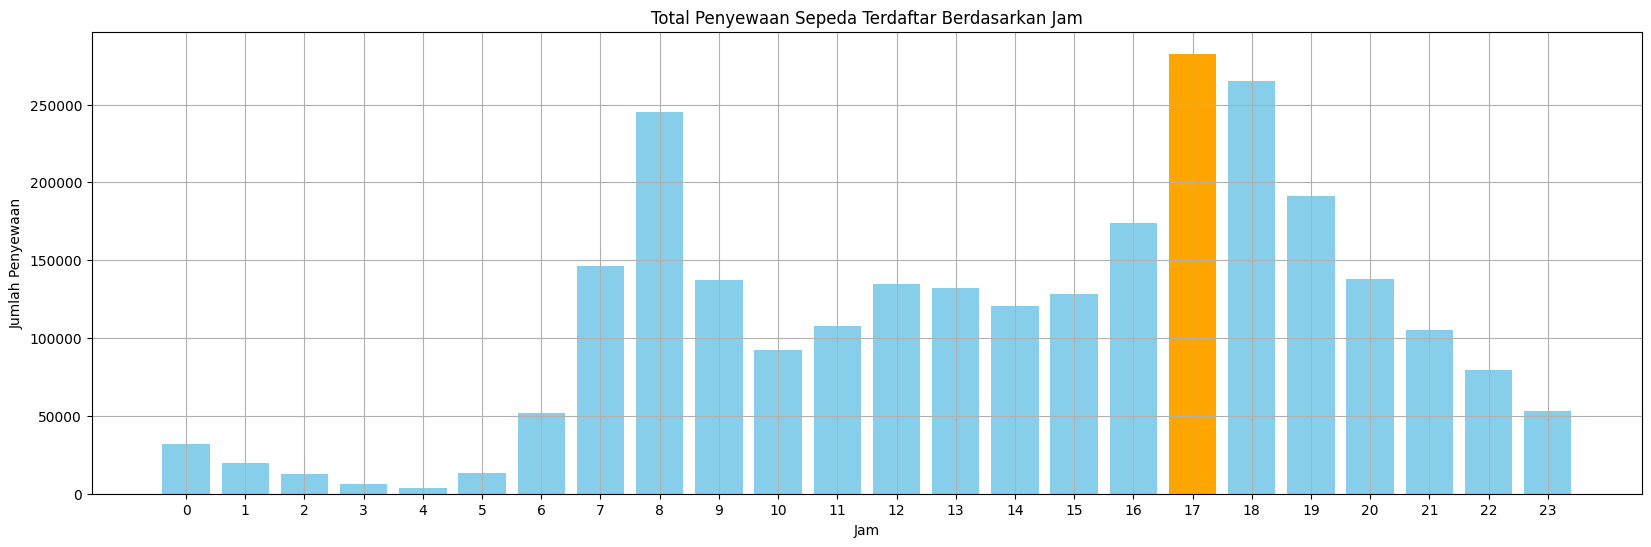

In [ ]:
pivot_table = pd.pivot_table(hour_df, values='registered', index='hr', aggfunc='sum')

seasons = pivot_table.index
sum_values = pivot_table['registered']

plt.figure(figsize=(20, 6))

max_value = sum_values.max()

for season, value in zip(seasons, sum_values):
    if value == max_value:
        plt.bar(season, value, color='orange')
    else:
        plt.bar(season, value, color='skyblue')

plt.title('Total Penyewaan Sepeda Terdaftar Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

plt.xticks(seasons)
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1
  1. Dari hasil analisis musim, terlihat
  bahwa musim ke-3 atau musism gugur memiliki total peminjaman tertinggi dengan rata-rata lebih dari 5.600 peminjaman per hari. Sedangkan musim ke-4 atau musim dingin merupakan total peminjaman terendah dari musim yang lain.
  2. Hasil analisis Hari, didapatkan bahwa hari ke-4 memiliki total peminjaman tertinggi dengan rata-rata lebih dari 4.600 peminjaman per hari. Sedangkan hari-1 menjadi hari dengan total peminjaman yang paling rendah dengan rata-rata sekitar 4.300 peminjaman per hari.
  3. Hasil analisis Jam, didapatkan Jam puncak peminjaman terjadi pada jam 17.00 dengan total peminajaman lebih dari 460.000. Dapat diamati juga jam-jam pagi sekitar jam 7.00-9.00 dan sore sekitar jam 16.00-18.00 memiliki retensi peminjaman cukup tinggi karena kemungkinan besar jam-jam tersebut merupakan jam berangkat dan pulang kerja.
- Conclution pertanyaan 2
  1. Berdasarkan Musim, baik penyewa casual ataupun terdaftar cenderung lebih aktif pada musim panas dan musim gugur. Namun intensitas dari penyewa terdaftar lebih tinggi.
  2. Berdasarkan Hari, baik penyewa casual atau terdaftar cenderung memiliki jumlah penyewaan yang lebih tinggi pada hari kerja (weekday = 1-4) dibandingkan dengan akhir pekan. Namun dapat dilihat bahwa penyewa kasual memiliki fluktuasi data yang lebih tinggi dari penyewa terdaftar.
  3. Berdasarkan Jam, pengguna kasual dan terdaftar memiliki puncak peminjaman pada jam-jam sore hingga malam, teruma pada jam 17.00-18.00. Terkhusus untuk pengguna terdaftar, puncak peminjama juga terjadi pada jam 7 hingga jam 9 pagi.

  Dengan demikian dapat disimpulkan bahwa terdapat sedikit perbedaan dalam pola penyewaan sepeda antara pengguna kasual dan terdaftar, terutama dalam hal prefensi musim, hari, dan jam.